# Project Title
Predicting probability of death from heart disease based on different risk factors
# Project Proposal
Using  Heart Failure Clinical Data databases, our goal is to identify which risk factors are more strongly related to the death from heart disease, and develop a model to predict the probability of death due to heart disease using these risk factors.
# Reference to Data Sources

## Heart Failure Clinical Data
Creator
Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020).
Original Publication
https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5

*Link*
https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


#Project Codes


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [65]:
url = 'https://raw.githubusercontent.com/laiz6660666/BA765-Session02/master/heart_failure_clinical_records_dataset.csv'
clinical = pd.read_csv(url)
clinical.head()
clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


#VISUALIZATION


# Overview For Different Features
An overview for all features, help us to easier find peak value and compare with each other


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f423afd1c18>,
      dtype=object)

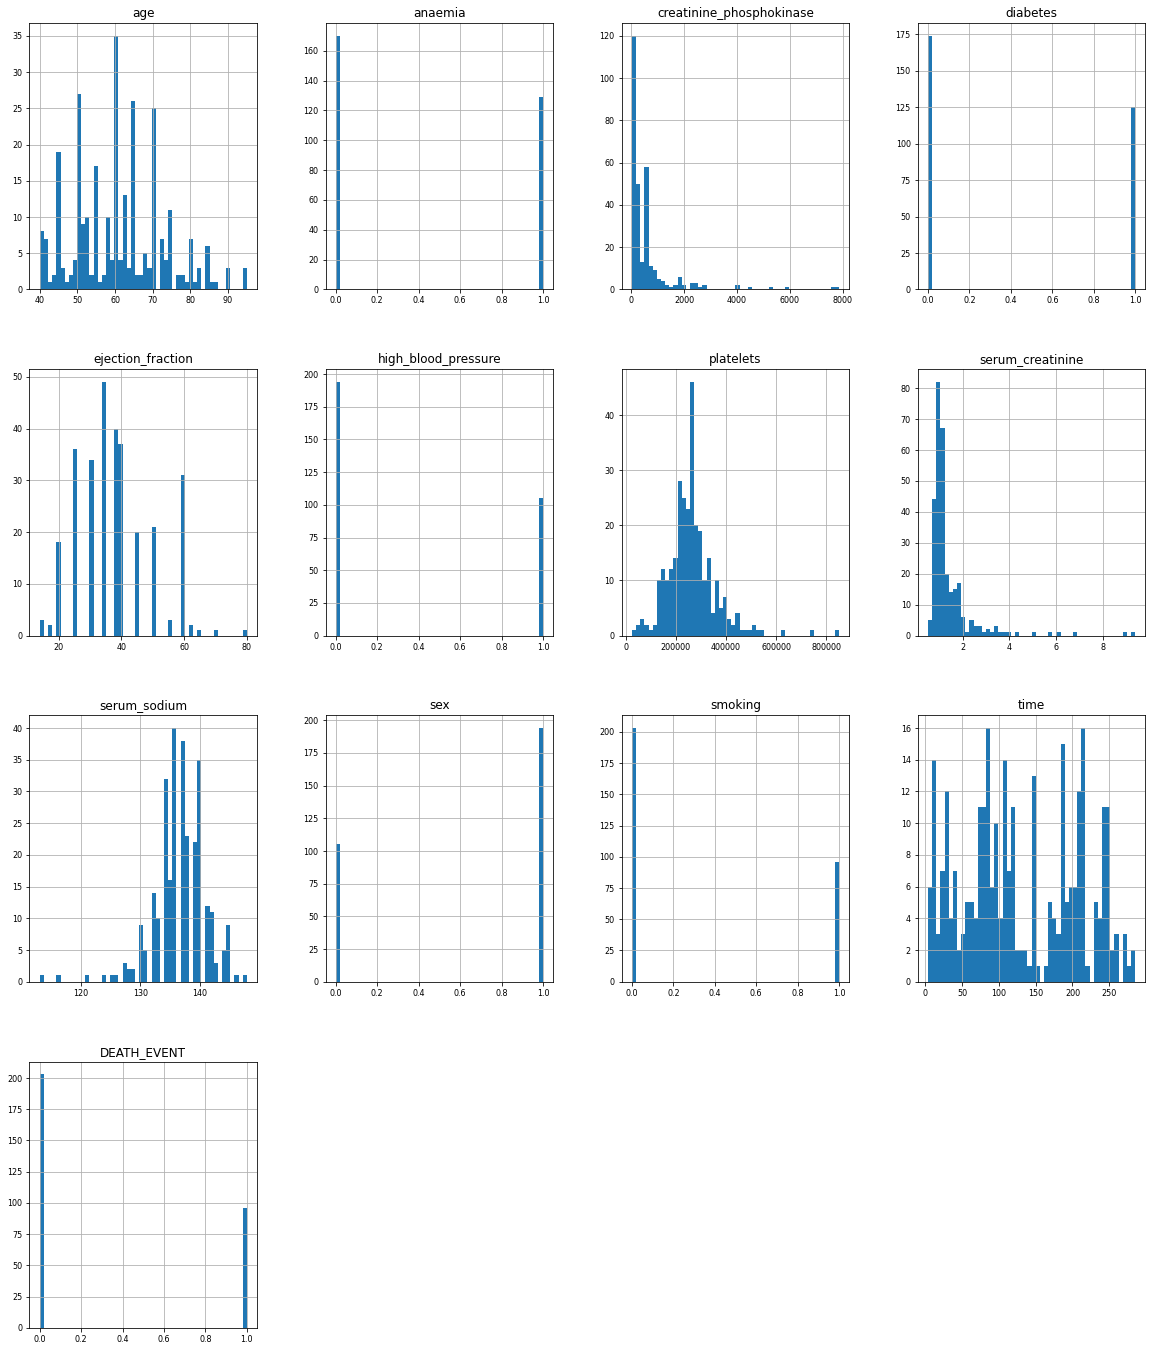

In [77]:
clinical.hist(figsize=(20, 24), bins=50, xlabelsize=8, ylabelsize=8)


#Heatmap for correlation between each feature 
The following heatmap shows the correlation between each feature
- the higher the correlation coefficient means these two variables are more dependent to each other

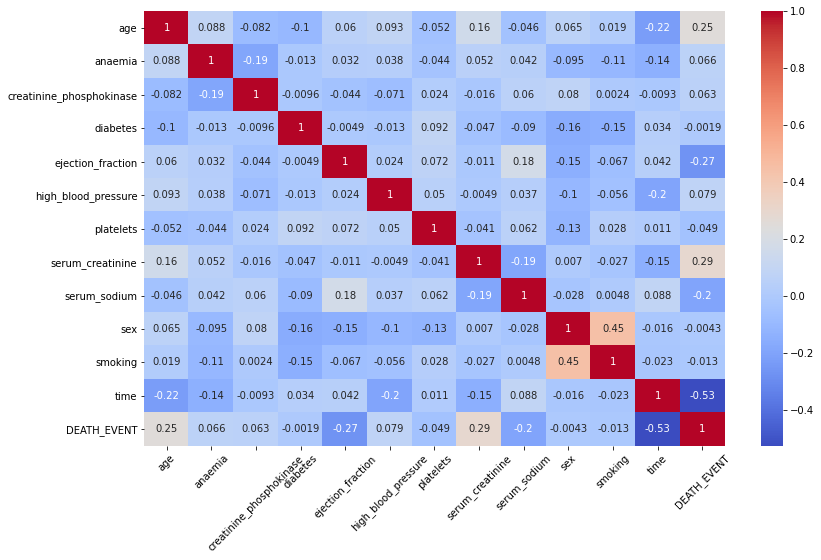

In [47]:
# Correlation between each feature 
plt.figure(figsize=(13,8))
sns.heatmap(clinical.corr(), annot = True, cmap = 'coolwarm')
plt.xticks(rotation = 45)
plt.show()

In [95]:
correlation = clinical.corr()
corr_target = abs(correlation['DEATH_EVENT'])
critical_features = corr_target[corr_target > 0.1]
critical_features

age                  0.253729
ejection_fraction    0.268603
serum_creatinine     0.294278
serum_sodium         0.195204
time                 0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

# Heart Failure Distribution for Ages
Age from 40 year-old to 80 year-old is high, and around 60 - 70 year-old take up highest proportion for patients and patients dead because of heart failure.


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


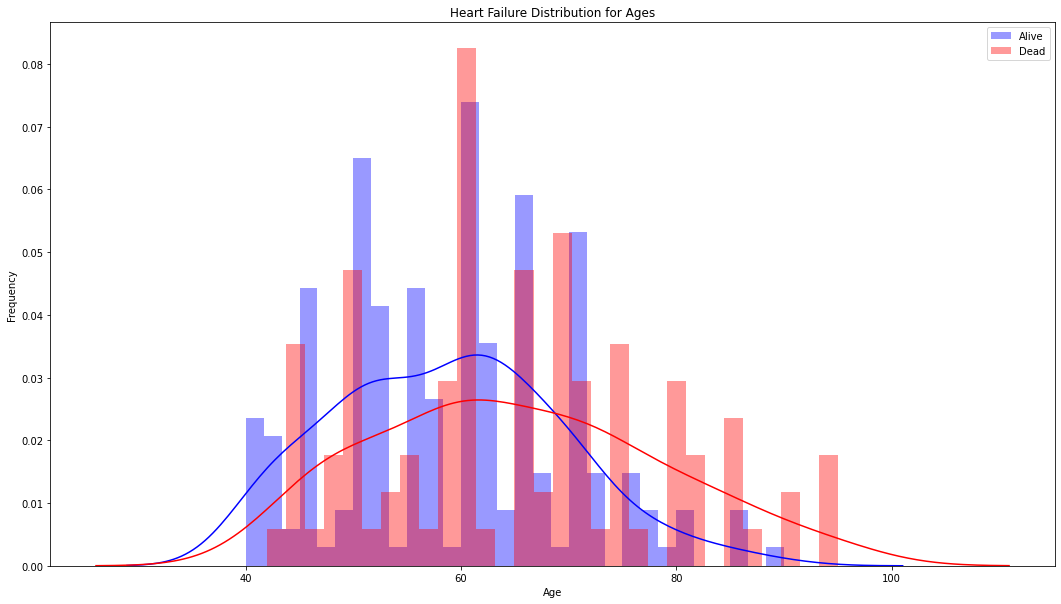

In [75]:
plt.figure(figsize=(18, 10))
sns.distplot(clinical.age[clinical['DEATH_EVENT'] == 0], bins=30, color='blue', label='Alive')
sns.distplot(clinical.age[clinical['DEATH_EVENT'] == 1], bins=30, color='red', label='Dead')
plt.legend()
plt.title('Heart Failure Distribution for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#Serum Creatinine vs. Serum Sodium
- As we see on the scatterplot, the death event concentrated on serum creatinine level = 2 and serum sodium level between 125 to 135
- Patients are more likely to die when serum creatinine and serum sodium both at low level


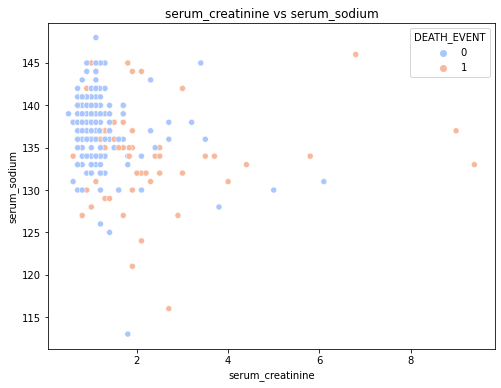

In [87]:
plt.figure(figsize=(8,6))
sns.scatterplot(y='serum_sodium',x='serum_creatinine',data=clinical,hue='DEATH_EVENT', palette='coolwarm')
plt.title('serum_creatinine vs serum_sodium')
plt.show()


#Ejection Fraction vs. Serum Sodium
- As we see on the scatterplot, the death event concentrated on serum creatinine level = 2 and ejection fraction from 20 to 30
- Patients are more likely to die when serum creatinine and ejection fraction both at low level


<Figure size 576x432 with 0 Axes>

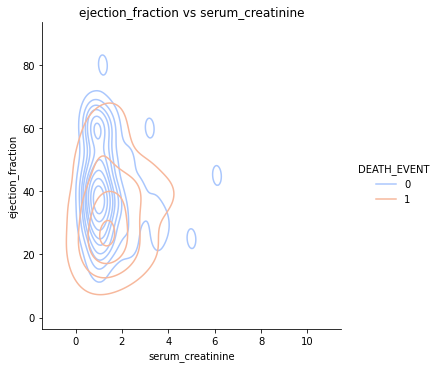

In [100]:
plt.figure(figsize=(8,6))
sns.displot(y='ejection_fraction',x='serum_creatinine',data=clinical,hue='DEATH_EVENT', palette='coolwarm', kind = 'kde')
plt.title('ejection_fraction vs serum_creatinine')
plt.show()

#K Nearest Neighbor Model


#Train and Test Split

In [90]:
from sklearn.neighbors import KNeighborsClassifier
Features = ['time','ejection_fraction','serum_creatinine']
x = clinical[Features]
y = clinical["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.5, random_state=2)